# EDA on Real Estate Dataset 

## Nakul Ramesh Varma - 21BDA35

### Import Packages

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(style = "darkgrid")
sns.set(rc = {'figure.figsize':(11.7,8.27)})

In [2]:
real_estate = pd.read_csv("Real estate.csv", index_col=0)

### Know the data

In [3]:
real_estate.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
real_estate.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

##### Change column names

In [5]:
real_estate.columns = ['transaction date','house age','distance to the nearest MRT station','number of convenience stores','latitude','longitude','house price of unit area']

In [6]:
real_estate.sample(5)

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
No,,,,,,,
27,2012.667,3.1,383.8624,5,24.98085,121.54391,56.2
84,2012.917,25.3,2707.3920,3,24.96056,121.50831,17.7
125,2012.917,9.9,279.1726,7,24.97528,121.54541,57.4
251,2013.167,39.2,424.7132,7,24.97429,121.53917,30.0
128,2013.250,3.8,383.8624,5,24.98085,121.54391,55.0


##### Check for any null values

In [7]:
real_estate.isnull().any()

transaction date                       False
house age                              False
distance to the nearest MRT station    False
number of convenience stores           False
latitude                               False
longitude                              False
house price of unit area               False
dtype: bool

In [8]:
real_estate.describe()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    float64
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


##### Change transaction date as int

In [10]:
real_estate["transaction date"] = real_estate["transaction date"].astype(int)

In [11]:
real_estate.corr()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
transaction date,1.000000,0.049171,0.016519,-0.005586,0.008118,0.013177,0.081545
house age,0.049171,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance to the nearest MRT station,0.016519,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.008118,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,0.013177,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house price of unit area,0.081545,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


### Visualize the data

#### Distribution of variables

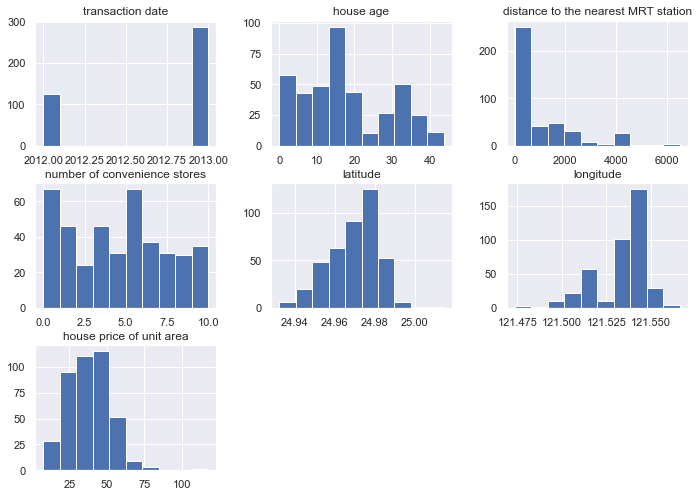

In [12]:
real_estate.hist()
plt.show()

#### Pair Plot

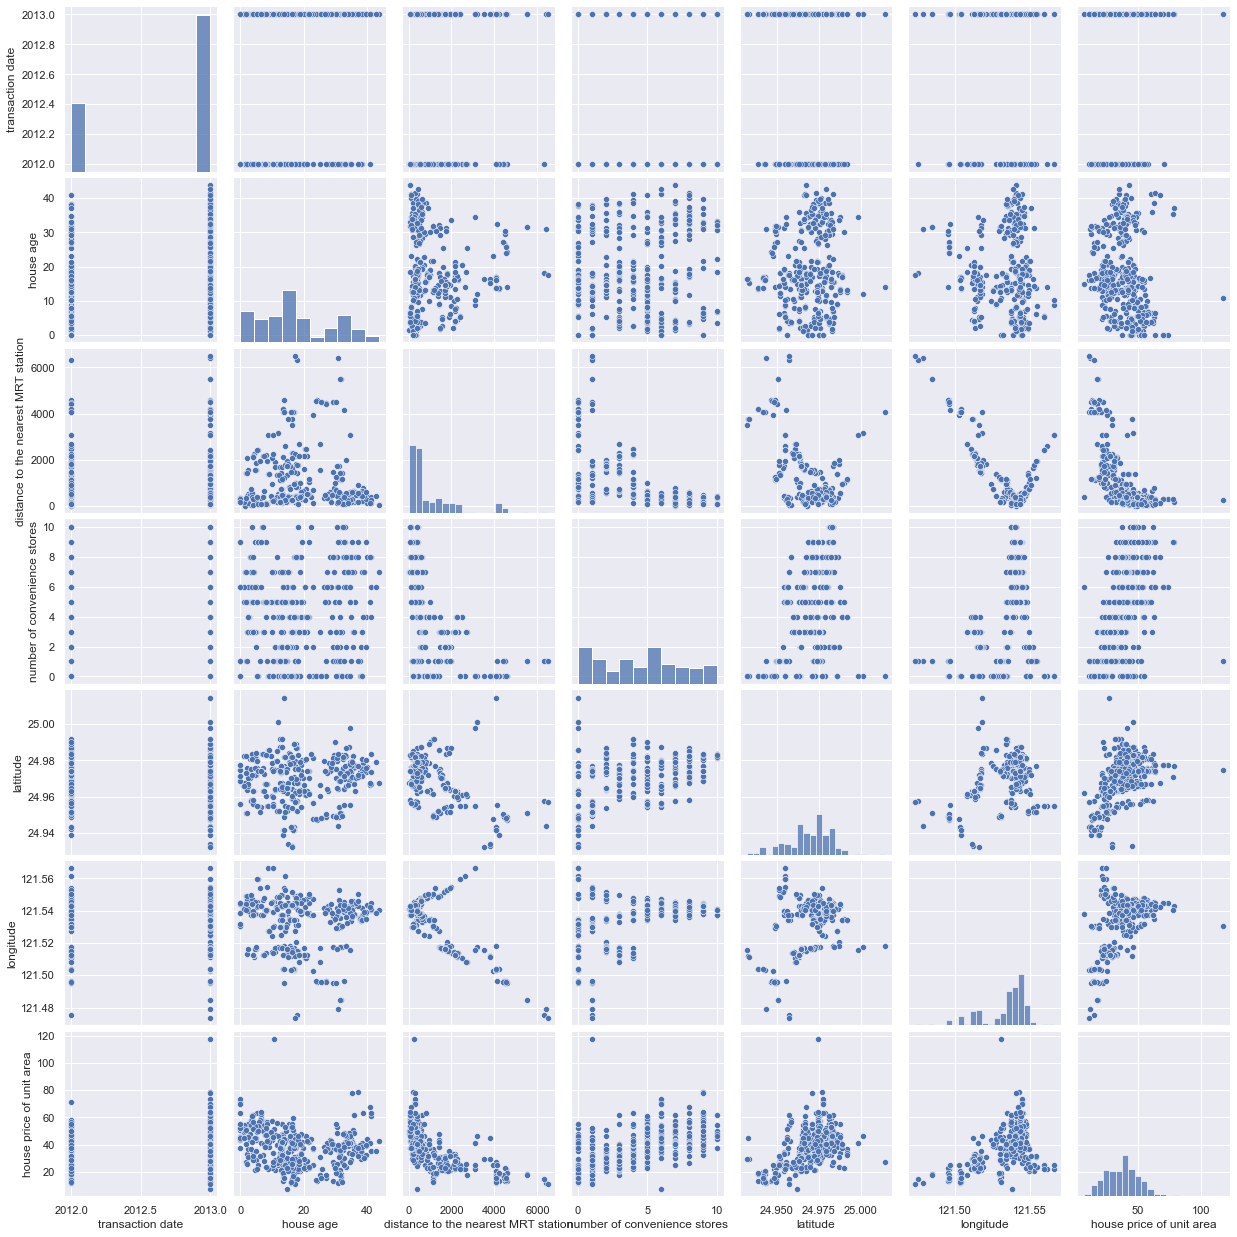

In [13]:
sns.pairplot(real_estate)

#### Relational Plot

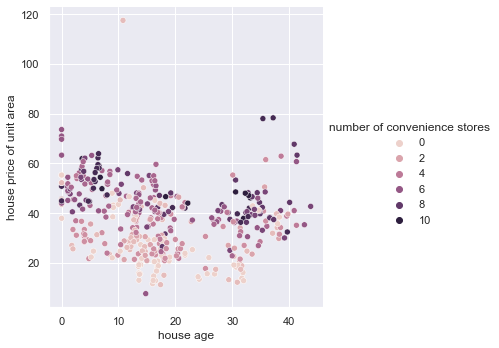

In [14]:
sns.relplot(x = "house age", y = "house price of unit area", data = real_estate, hue = "number of convenience stores")

#### Heat Map

<AxesSubplot:>

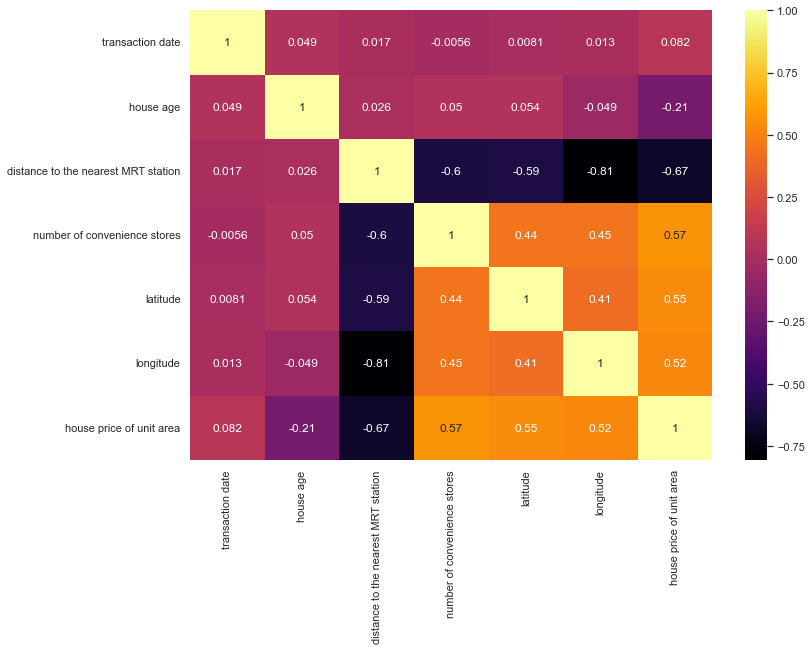

In [15]:
sns.heatmap(real_estate.corr(), annot=True, cmap = "inferno")

#### Distribution Plot

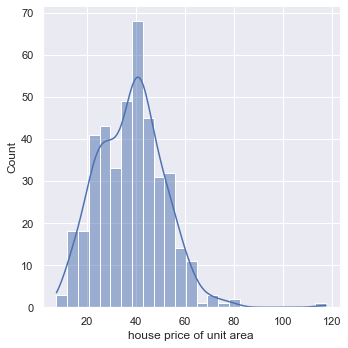

In [16]:
sns.displot(data= real_estate, x='house price of unit area' , bins=25 , kde=True)

#### Violin Plot

<AxesSubplot:xlabel='transaction date', ylabel='house price of unit area'>

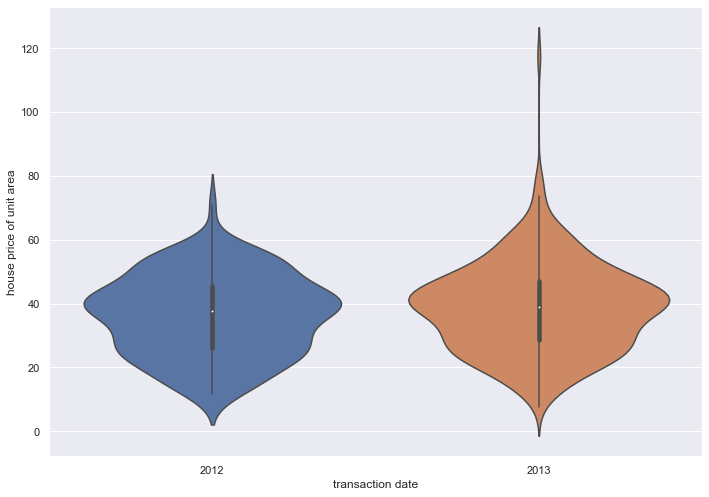

In [17]:
sns.violinplot(x = "transaction date", y = "house price of unit area", data = real_estate)

#### Categorical Plot

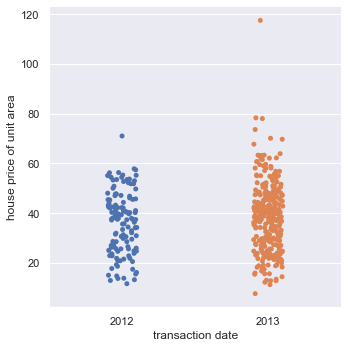

In [18]:
sns.catplot(x = "transaction date", y = "house price of unit area", data = real_estate)

#### Swarm Plot

<AxesSubplot:xlabel='transaction date', ylabel='house price of unit area'>

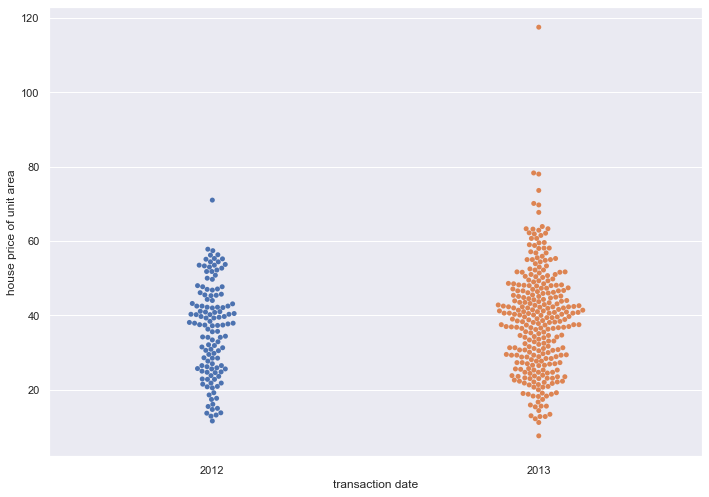

In [19]:
sns.swarmplot(x = "transaction date", y = "house price of unit area", data = real_estate)

#### Joint Plot

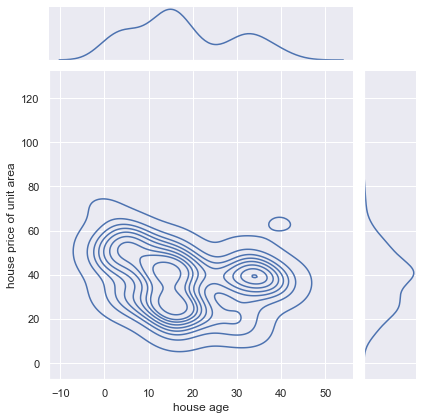

In [20]:
sns.jointplot(x = "house age", y = "house price of unit area", data = real_estate, kind="kde")

#### lm Plot

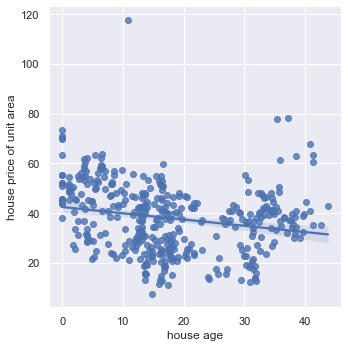

In [21]:
sns.lmplot(x = "house age", y = "house price of unit area", data = real_estate)

#### Cluster Map

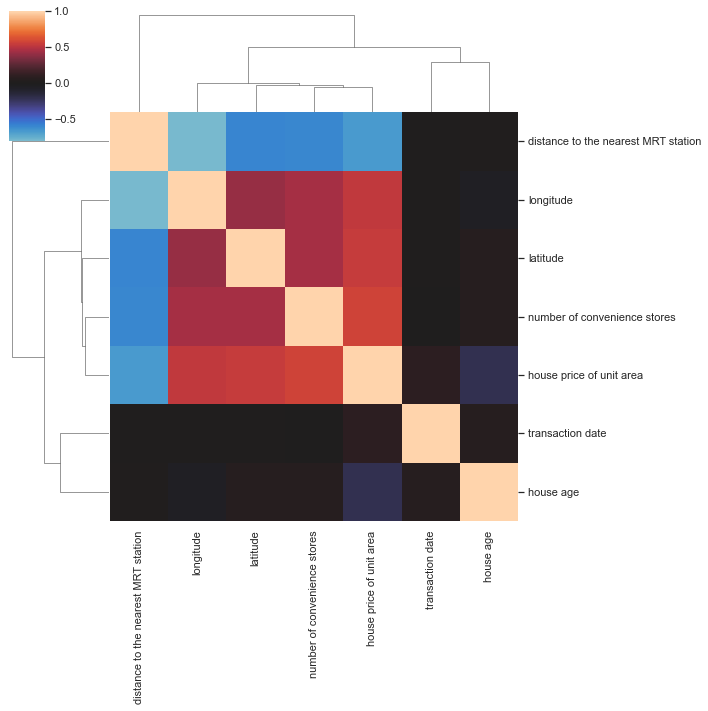

In [22]:
sns.clustermap(real_estate.corr(), center=0)